In [9]:
% matplotlib notebook 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [3]:
data = np.loadtxt('/Users/ash/Downloads/call_center.csv')
print('Size of data set:', len(data))
print('First 10 values in data set:', data[:10])
print('Sum of data set:', sum(data))

Size of data set: 5891
First 10 values in data set: [ 5.36  2.48  8.08  1.54 11.1  10.7  21.   11.1  14.7  32.9 ]
Sum of data set: 1442.145437310004


In [4]:
# Split the data into 24 separate series, one for each hour of the day
# Code from Scheffler's gist 
# (https://gist.github.com/cscheffler/6a03c9473297f21b78363ec7301d19d8#file-cs146-2-2-pre-class-work-ipynb)
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in data:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

<IPython.core.display.Javascript object>


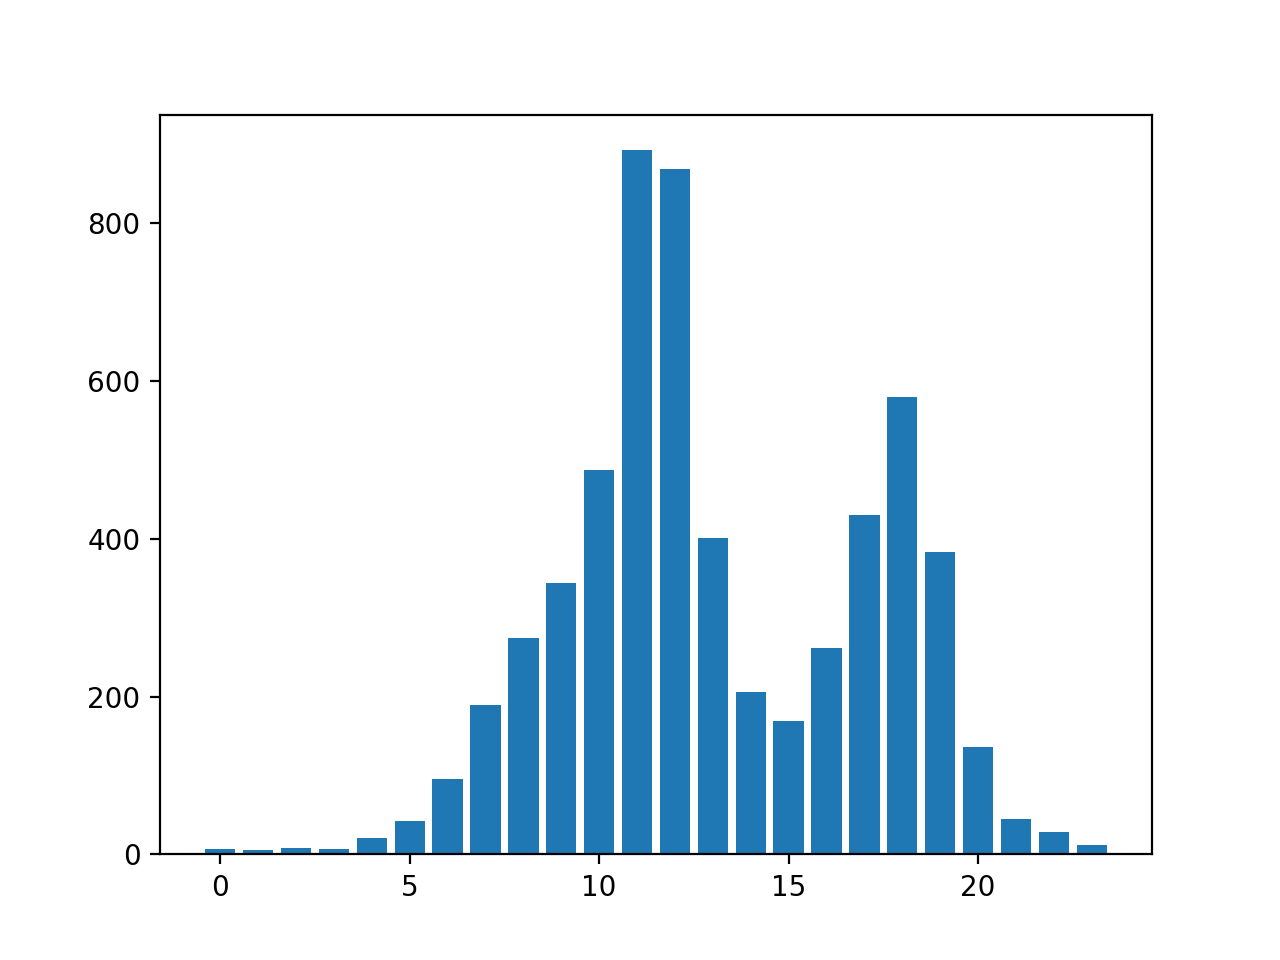

In [6]:
count_list = [len(_) for _ in waiting_times_per_hour]
dumb = [_ for _ in range(24)]
plt.bar(dumb, count_list)
plt.show()

<IPython.core.display.Javascript object>


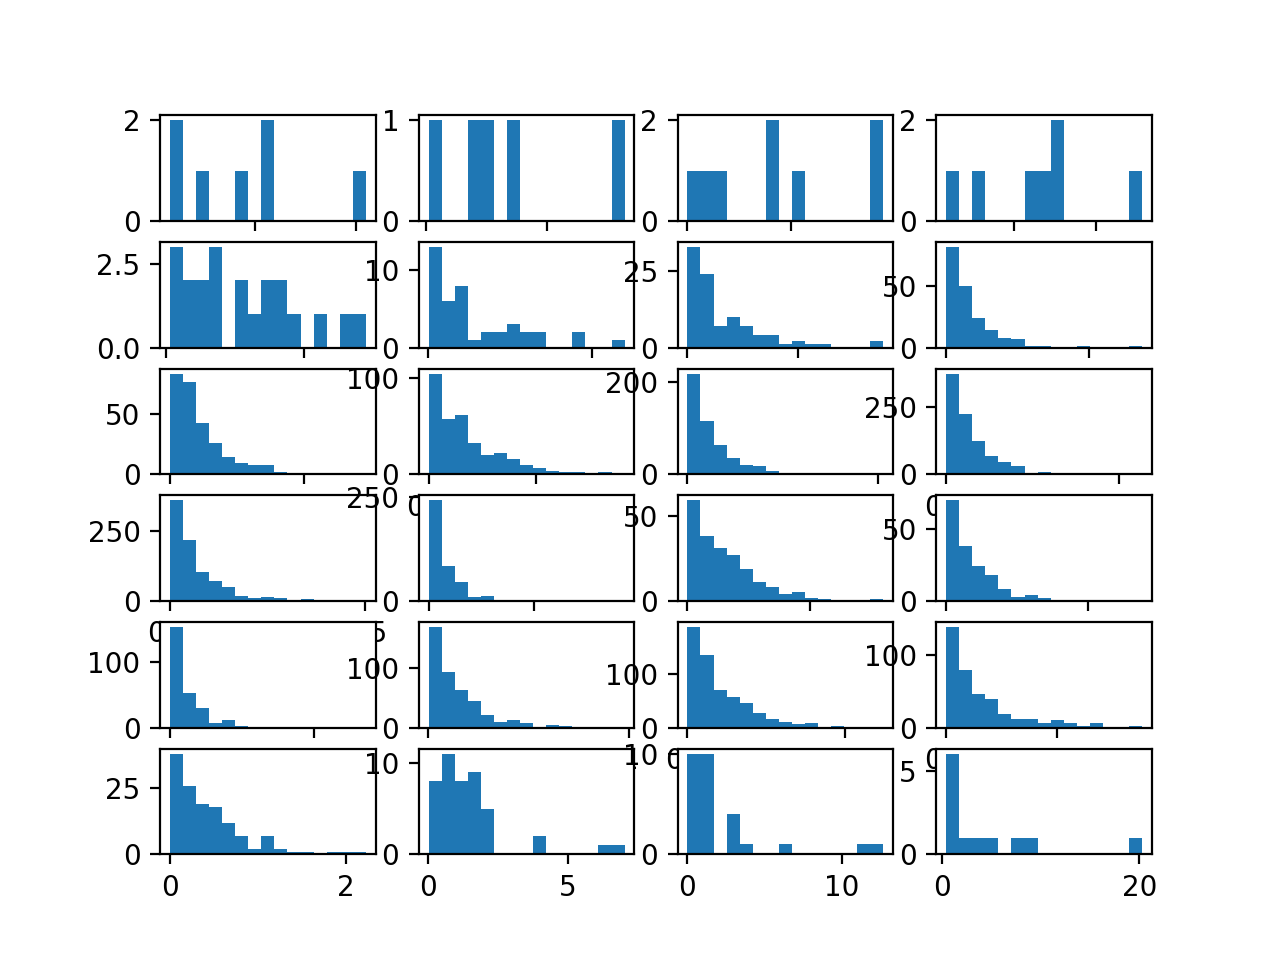

In [19]:
for _ in range(24): 
    plt.subplot(6,4,_+1)
    plt.hist(waiting_times_per_hour[_], bins=15)
plt.show()

In [7]:
# Modeling the prior as a gamma distribution and the likelihood as an exponential distribution 
# with the following parameters
a_prior = 1 
b_prior = 2.5
rate_likelihood = 3

# Defining a function to update the posterior with available data based on the conjugate prior formula
def define_post(data, aprior, bprior): 
    n = len(data)
    s = sum(data)
    a_post, b_post = aprior+n, bprior+s
    posterior = stats.gamma(a = a_post, scale = 1/b_post)
    return posterior

# Defining the prior and the likelihood
prior = stats.gamma(a = a_prior, scale = 1/b_prior)
likelihood = stats.expon(scale=1/rate_likelihood)

In [61]:
x = np.linspace(0,25,200)
for _ in range(24): 
    posterior = define_post(waiting_times_per_hour[_], a_prior, b_prior)
    plt.subplot(6,4,_+1)
    plt.plot(x, posterior.pdf(x))
plt.show()

<IPython.core.display.Javascript object>


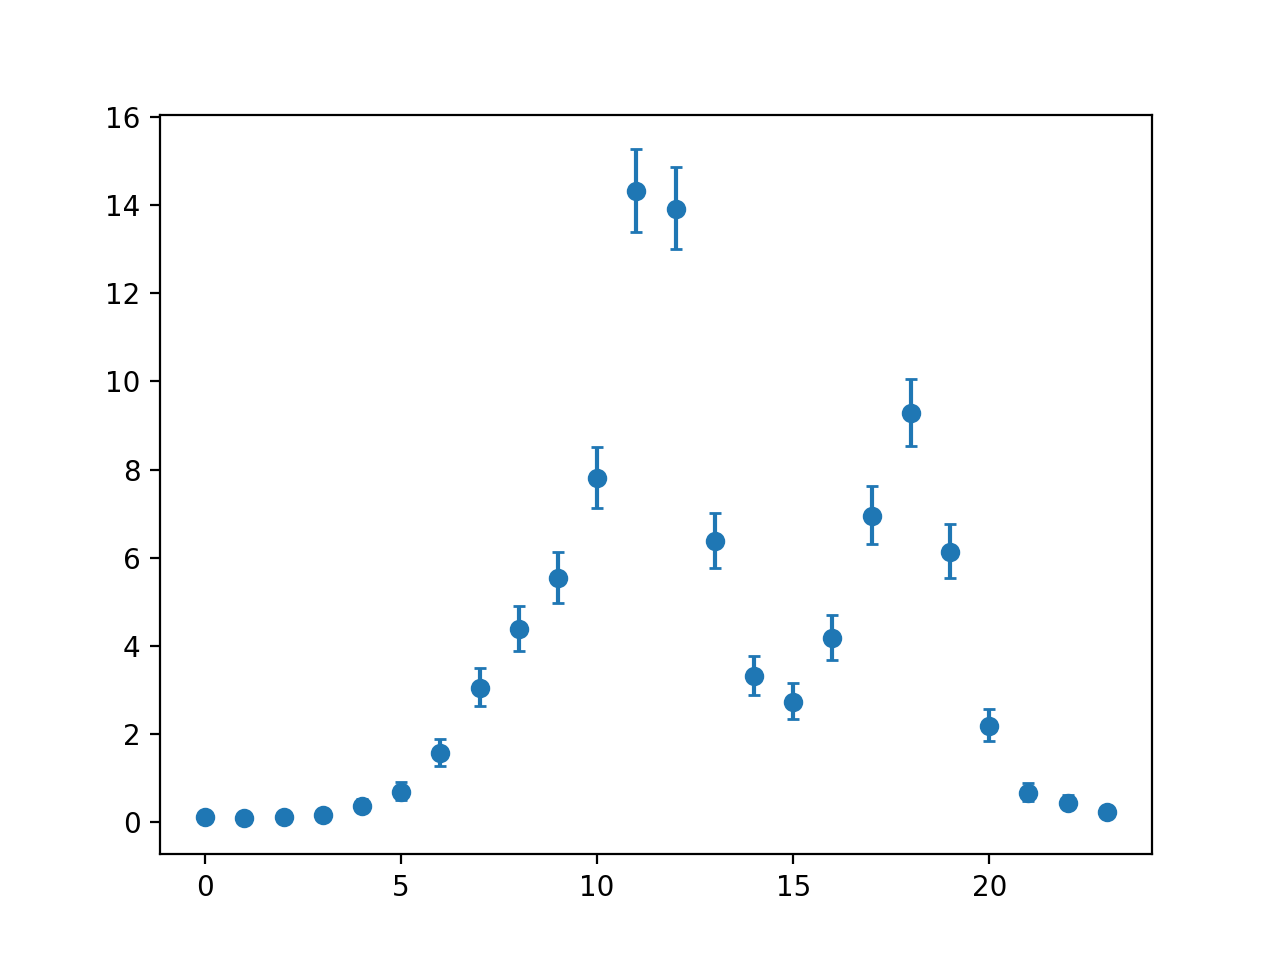

In [8]:
# Defining lists and arrays to record the means and error bars
mins = np.ones(24)
maxs = np.ones(24)
means = []

# Looping over all 24 hours and using the defined function to calculate the posterior, which 
# then tell us the means and 95% confidence intervals
for _ in range(24):
    posterior = define_post(waiting_times_per_hour[_], a_prior, b_prior)
    min_, max_ = posterior.interval(0.95)
    mean_ = posterior.mean()
    means.append(mean_)
    mins[_] = min_
    maxs[_] = max_

# Plotting the means and the error bars
intervals = [np.absolute(mins-means), np.absolute(maxs-means)]
plt.errorbar(x=[_ for _ in range(24)], y=means, yerr= intervals,fmt='o', capsize=2)
plt.xlabel('Hour of the day')
plt.ylabel('Call rate (call/minutes)')
plt.show()

In [13]:
d = {'Mean': means, '95% CI Lower Bound': mins, '95% Upper Bound': maxs}
df = pd.DataFrame(data=d)
print(df)

    95% CI Lower Bound  95% Upper Bound       Mean
0             0.055032         0.229807   0.127470
1             0.031400         0.166398   0.085564
2             0.056987         0.218279   0.124626
3             0.073646         0.307533   0.170583
4             0.225710         0.525518   0.360160
5             0.498491         0.909411   0.688805
6             1.265881         1.886619   1.561019
7             2.626194         3.491338   3.043599
8             3.879804         4.915417   4.382520
9             4.967570         6.135692   5.536435
10            7.127521         8.512193   7.804711
11           13.399793        15.278563  14.323986
12           13.007577        14.856947  13.917112
13            5.774776         7.022556   6.383628
14            2.876432         3.778503   3.312317
15            2.338408         3.159930   2.733944
16            3.682471         4.692592   4.172452
17            6.305547         7.616780   6.945902
18            8.539682        1

<IPython.core.display.Javascript object>


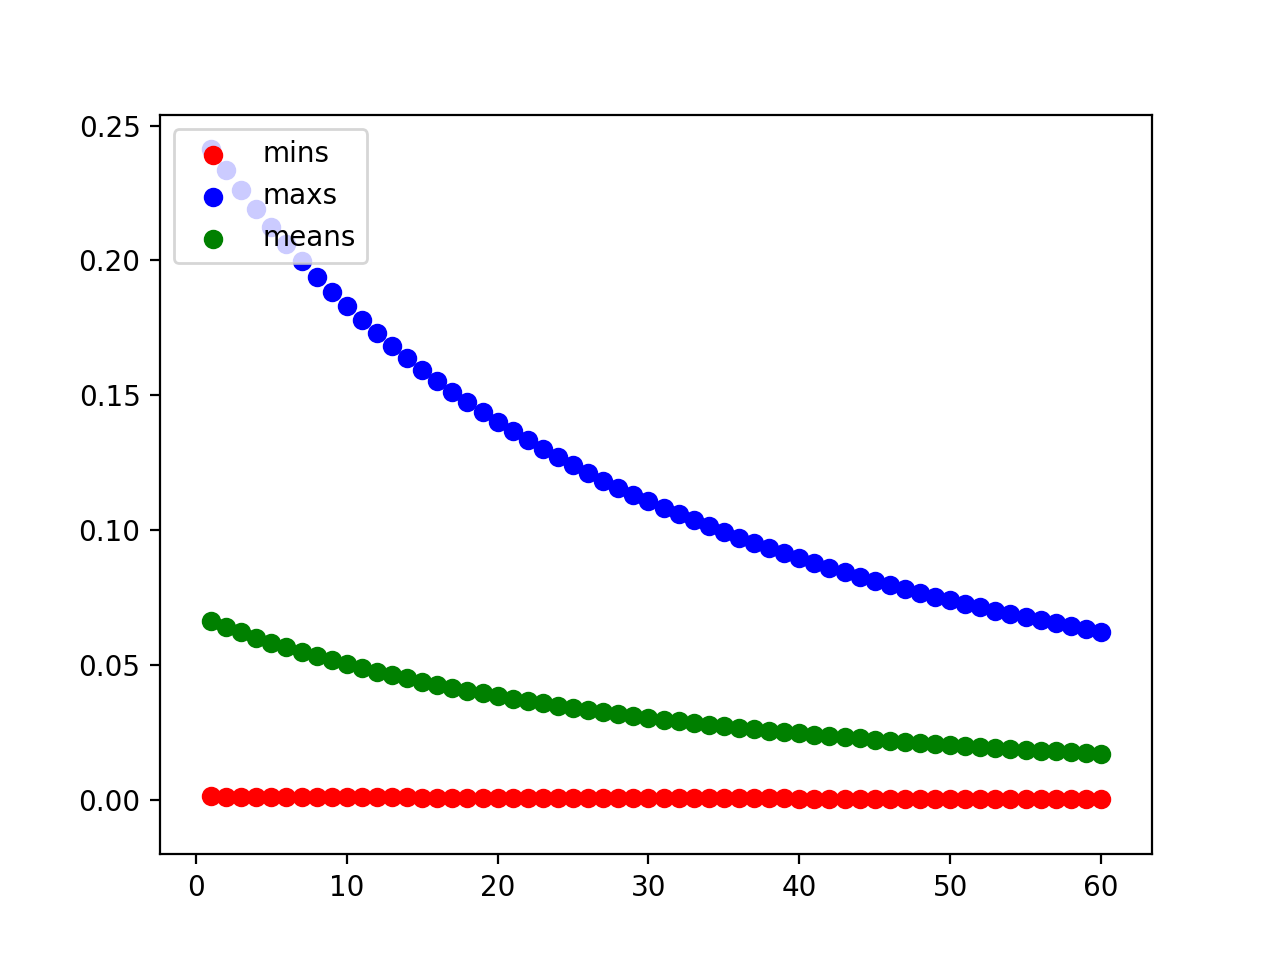

In [28]:

def define_post(data, aprior, bprior): 
    n = len(data)
    s = sum(data)
    a_post, b_post = aprior+n, bprior+s
    posterior = stats.gamma(a = a_post, scale = 1/b_post)
    return posterior

def test_a_b_rate(a, b, rate): 
    a_prior = a 
    b_prior = b
    rate_likelihood = rate
    prior = stats.gamma(a = a_prior, scale = 1/b_prior)
    likelihood = stats.expon(scale=1/rate_likelihood)

    vars_ = []
    for _ in range(24):
        posterior = define_post(waiting_times_per_hour[_], a_prior, b_prior)
        var = posterior.var()
        vars_.append(var)
    return min(vars_), max(vars_), np.mean(vars_)
    
a = np.linspace(1,60,60)
b = np.linspace(1,60,60)
rate = np.linspace(1,60,60)

mis, mas, mes = [], [], [] 
for _ in b: 
    mi, ma, me = test_a_b_rate(a=1,b=_,rate=4)
    mis.append(mi)
    mas.append(ma)
    mes.append(me)
    
plt.scatter(rate, mis, color='red', label='mins')
plt.scatter(rate, mas, color='blue', label='maxs')
plt.scatter(rate, mes, color='green', label='means')
plt.legend(loc=2)
plt.show()